# **Classification tools in MLLib**

In this session, we are going to work with the [MNIST dataset](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist), a widely used dataset in machine learning for testing classification algorithms. The goal of the problem is automatically classify digit images with 784 (28x28) pixels among the ten possible digits.

We will start working with a reduced version of this dataset consisting of 60,000 training data and 10,000 test samples. But, after completing this notebook, you can analyze the scalability of the different approaches by using the [large version of the MNIST dataset](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist8m) with 8.100.000 patterns.

In this notebook we will learn to manage the classification tools avaliable in MLLIB, selecting a linear SVM as example of classifier. The outline of this notebook is:

**1. Data reading and preprocessing**

  a) Loading the training data
  
  b) Data analysis
  
  c) Data preprocessing: normalization
  
  d) Preparing training DF
  
  e) Preparing the test DF
  
**2. Solving classification problems**

  a) Binary classification with SVMs
    
  b) SVM evaluation
    
  c) Multiclass SVM
    
  d) Cross validation of hyperparameters
    
**HOMEWORK: feature selection over Spark**

In [0]:
# Homework by
# Mireia Kesti NIA: 100406960
# and
# Aleksandra Jamróz NIA: 100491363

## **1. Data reading and preprocessing**

### **1.a) Loading the training data**

Together with this notebook, you have downloaded two data files:
* "mnist": where you can find the 60.000 training data
* "mnist.t": where there are additional 10.000 test images

Let's start uploading these files to Databricks and let's load the training file to analyze the format of the data.

In [0]:
# Load the data file as a dataframe & store it in the variable textDF
""" 
The file has to be uploaded to Databricks first:
Go to Data --> create Table --> upload file --> once uploaded, click "create table with UI" --> attach same cluster as for this notebook --> click "preview table" --> once preview loaded, click "create table"
"""
fileName = "/FileStore/tables/mnist"
textDF = sqlContext.read.text(fileName)

**Exercise:**
Once the data are loaded in the variable textDF:
1. Show the first 10 lines of the DF
2. Count the total number of lines in the file (or rows of the DF)
3. Show the content of the first line

In [0]:
# Show the first 10 lines of the DF
textDF.show(10)

# Count the number of lines
n_lines = textDF.count()
print('Number of lines: ' + str(n_lines))

# Display the ontent of the first line
line = textDF.first()
print('First line content:')
print(line)

+--------------------+
|               value|
+--------------------+
|5 153:3 154:18 15...|
|0 128:51 129:159 ...|
|4 161:67 162:232 ...|
|1 159:124 160:253...|
|9 209:55 210:148 ...|
|2 156:13 157:25 1...|
|1 125:145 126:255...|
|3 152:38 153:43 1...|
|1 153:5 154:63 15...|
|4 135:189 136:190...|
+--------------------+
only showing top 10 rows

Number of lines: 60000
First line content:
Row(value='5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35 3

**_The answer should be_:**
<pre><code>
+--------------------+
|               value|
+--------------------+
|5 153:3 154:18 15...|
|0 128:51 129:159 ...|
|4 161:67 162:232 ...|
|1 159:124 160:253...|
|9 209:55 210:148 ...|
|2 156:13 157:25 1...|
|1 125:145 126:255...|
|3 152:38 153:43 1...|
|1 153:5 154:63 15...|
|4 135:189 136:190...|
+--------------------+
only showing top 10 rows

Number of lines: 60000
First line content:
Row(value=u'5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35 378:241 379:225 380:160 381:108 382:1 406:81 407:240 408:253 409:253 410:119 411:25 435:45 436:186 437:253 438:253 439:150 440:27 464:16 465:93 466:252 467:253 468:187 494:249 495:253 496:249 497:64 519:46 520:130 521:183 522:253 523:253 524:207 525:2 545:39 546:148 547:229 548:253 549:253 550:253 551:250 552:182 571:24 572:114 573:221 574:253 575:253 576:253 577:253 578:201 579:78 597:23 598:66 599:213 600:253 601:253 602:253 603:253 604:198 605:81 606:2 623:18 624:171 625:219 626:253 627:253 628:253 629:253 630:195 631:80 632:9 649:55 650:172 651:226 652:253 653:253 654:253 655:253 656:244 657:133 658:11 677:136 678:253 679:253 680:253 681:212 682:135 683:132 684:16')
</code></pre>

If you analyze the content of the first line, you can check that the labels and the variables are mixed. And, in addition, the variables appear in a sparse format. This data format (known as LIBSVM format) is very common in practice to store [labeled sparse data](https://spark.apache.org/docs/2.2.0/mllib-data-types.html#labeled-point). In fact, this is a text format in which each line represents a labeled sparse feature vector using the following convention:

    label index1:value1 index2:value2 ...
where the indices are one-based and in ascending order. 

By luck, MLLIB includes a specific funtion [spark.read.format("libsvm")](https://spark.apache.org/docs/latest/sql-programming-guide.html#manually-specifying-options) which directly reads this format data file and returns a DF with two columns: "label" and "features". Besides, the features are saved in a pyspark.ml.linalg.SparseVector. 

  *A sparse vector is backed by two parallel arrays: indices and values. For example, a vector (1.0, 0.0, 3.0) can be represented in sparse format as (3, [0, 2], [1.0, 3.0]), where 3 is the size of the vector.*

Run the next cell to load the datafile with the spark.read.format("libsvm") function.

*Note:* To load the data, we have indicated with the option "numFeatures" that the total number of pixels is 784. This is useful when some pixels may not present in certain files (because there are always zero), avoiding inconsistent dimensions.

In [0]:
# Load the datafile with the spark.read.format("libsvm") function
# The libsvm package implements Spark SQL data source API for loading LIBSVM data as DataFrame
# The loaded DataFrame has 2 columns: label (contains labels stored as doubles) & features (contains feature vectors stored as vectors)

fileName = "/FileStore/tables/mnist"
dataDF = spark.read.format("libsvm").option("numFeatures", "784").load(fileName)

**Exercise:**
Using the structured DF "dataDF", analyze again:
1. The content of the first 5 lines of the DF
2. Count the total number of lines in the file (or rows of the DF)
3. Show the content of the first line: extracting separately the label and the features. What data type is used to store the features?

In [0]:
# Show the first 5 lines of the DF
textDF.show(5)

# option 1 - took 8,27 seconds

# Count the total number of lines in the file
n_lines = dataDF.count()
print ('Number of lines: ' + str(n_lines))

# Display content of the first line: extracting the label & features
line = dataDF.first()
print( 'Label: ' + line.label)
print( 'Features:' )
print( line["features"] )

# Feature data type
print(type(line["features"]))


""" 
# option 2 - took 10,62 seconds

# Count the total number of lines
n_lines = dataDF.count()
print('Number of lines: %d' %n_lines)

# Display content of the first line: extracting the label & features
line = dataDF.take(1)
print('Label: %d' %line[0].label)
print('Features: %s' %line[0].features)

# Feature data type
print(type(line))

"""

+--------------------+
|               value|
+--------------------+
|5 153:3 154:18 15...|
|0 128:51 129:159 ...|
|4 161:67 162:232 ...|
|1 159:124 160:253...|
|9 209:55 210:148 ...|
+--------------------+
only showing top 5 rows

Number of lines: 60000
Label: %d
Features:
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0

**_The answer should be_:**
<pre><code>
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Number of lines: 60000
Label: 5
Features:
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,43.0,154.0,14.0,1.0,154.0,253.0,90.0,139.0,253.0,190.0,2.0,11.0,190.0,253.0,70.0,35.0,241.0,225.0,160.0,108.0,1.0,81.0,240.0,253.0,253.0,119.0,25.0,45.0,186.0,253.0,253.0,150.0,27.0,16.0,93.0,252.0,253.0,187.0,249.0,253.0,249.0,64.0,46.0,130.0,183.0,253.0,253.0,207.0,2.0,39.0,148.0,229.0,253.0,253.0,253.0,250.0,182.0,24.0,114.0,221.0,253.0,253.0,253.0,253.0,201.0,78.0,23.0,66.0,213.0,253.0,253.0,253.0,253.0,198.0,81.0,2.0,18.0,171.0,219.0,253.0,253.0,253.0,253.0,195.0,80.0,9.0,55.0,172.0,226.0,253.0,253.0,253.0,253.0,244.0,133.0,11.0,136.0,253.0,253.0,253.0,212.0,135.0,132.0,16.0])
class 'pyspark.ml.linalg.SparseVector'

</code></pre>

### **1.b) Data analysis**

To analyze in detail the type of data that we are handling, let's draw some of the digit images.

**Exercise:** using the function provided in the next cell, plot the first 10 rows of dataDF.

In [0]:
import matplotlib.pyplot as plt
# Collection of command style functions that make matplotlib work like MATLAB
# Each pyplot function makes some change to a figure

from pyspark.mllib.linalg import Vectors
# Factory methods for working with vectors

"""
Dense vectors are represented as NumPy array objects, so there is no need to covert them to use them in MLlib. Dense vectors are backed by a double array representing its entry values; i.e. dense dimensions have data values for the majority of member combinations.
MLlib recognizes the following types as dense vectors:
- NumPy’s array,
- Python’s list, e.g., [1, 2, 3]

For sparse vectors, the factory methods in this class create an MLlib-compatible type, or users can pass in SciPy’s scipy.sparse column vectors. Sparse vectors are  represented by two parallel arrays: indices and values, i.e. they lack data values for the majority of member combinations.
MLlib recognizes the following types as sparse vectors:
- MLlib’s SparseVector,
- SciPy’s csc_matrix with a single column

For efficiency purposes, it is better to use NumPy arrays over lists, and to use the factory methods implemented in Vectors to create sparse vectors. 
"""


# Plot the set of images provided in images
def plot_data(images, h, w, n_row=1, n_col=10):
    """
    Args:
        images (list of sparse vectors or numpy arrays): list of images where each image contains the 
            features corresponding to the pixels of an image.  
        h: heigth of the image (in number of pixels).
        w: width of the image (in number of pixels).
        n_row: Number of rows to use when plotting all the images
        n_col: Number of columns to use when plotting all the images
    """
    
    fig = plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    
    for i in range(len(images)):
        plt.subplot(n_row, n_col, i + 1)      
        try: # In the case each element of "images" is a row data with a variable "features" 
            img = images[i].features.toArray()
        except: # In the case each element of "images" is directly the pixel values
            img = images[i]
            
        plt.imshow(img.reshape((h, w )), cmap=plt.cm.jet)
        plt.xticks(())
        plt.yticks(())
    return fig

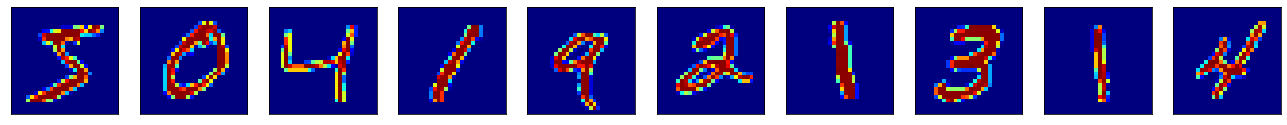

In [0]:
# Define the height and width of the images
h = 28
w = 28

# Pick up 10 images and plot them using the function  plot_data()
images = dataDF.take(10)
fig = plot_data(images, h, w)
# display(fig)

**_The answer should be_:**
<pre><code>
featuresDF:pyspark.sql.dataframe.DataFrame = [features: udt]
<img src="http://www.tsc.uc3m.es/~vanessa/figsdatabricks/fig_digits.png"/>
</code></pre>

### **1.c) Data preprocessing: normalization**

In general, normalization process consists of two steps:
1. Removing the mean of each feature
2. Rescaling each feature so that it has a unit standard deviation

Because we are working with sparse data (most of the input characteristics are zero), if we eliminate the mean we would be converting null values into non-zero values, thus increasing the size (in memory) of the data set. To avoid this problem here we're just going to rescale the data.

**Exercise:** Complete the following cell to reescale the data by making use of the [StandardScaler()](https://spark.apache.org/docs/2.1.0/ml-features.html#standardscaler) method of MLLIB

In [0]:
# Rescale the data by making use of the StandardScaler() method of MLLIB
# Note: StandardScaler method has two input variables, 'withMean' and 'withStd', which let you select, respectively, whether the mean and standard deviation are corrected or not.

from pyspark.ml.feature import StandardScaler

# Define the normalizer object: indicate that you only want each feature to have unit standard deviation. Use the nomenclature "normFeatures" for column with the output normalized features.
scaler = StandardScaler(inputCol="features", outputCol="normFeatures", withStd=True, withMean=False)

# Fit the StandardScaler: learn the statistics of the data
scalerModel = scaler.fit(dataDF)

# Normalize the data: apply the normalization transformation
scaledData = scalerModel.transform(dataDF)

# For the first data: compare the first 10 original features with the normalized ones
firstData = scaledData.first()
print(firstData.features)
print(firstData.normFeatures)

(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.

**_The answer should be_:**
<pre><code>

scaledData:pyspark.sql.dataframe.DataFrame = [label: double, features: udt ... 1 more fields]
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[3.0,18.0,18.0,18.0,126.0,136.0,175.0,26.0,166.0,255.0,247.0,127.0,30.0,36.0,94.0,154.0,170.0,253.0,253.0,253.0,253.0,253.0,225.0,172.0,253.0,242.0,195.0,64.0,49.0,238.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,251.0,93.0,82.0,82.0,56.0,39.0,18.0,219.0,253.0,253.0,253.0,253.0,253.0,198.0,182.0,247.0,241.0,80.0,156.0,107.0,253.0,253.0,205.0,11.0,43.0,154.0,14.0,1.0,154.0,253.0,90.0,139.0,253.0,190.0,2.0,11.0,190.0,253.0,70.0,35.0,241.0,225.0,160.0,108.0,1.0,81.0,240.0,253.0,253.0,119.0,25.0,45.0,186.0,253.0,253.0,150.0,27.0,16.0,93.0,252.0,253.0,187.0,249.0,253.0,249.0,64.0,46.0,130.0,183.0,253.0,253.0,207.0,2.0,39.0,148.0,229.0,253.0,253.0,253.0,250.0,182.0,24.0,114.0,221.0,253.0,253.0,253.0,253.0,201.0,78.0,23.0,66.0,213.0,253.0,253.0,253.0,253.0,198.0,81.0,2.0,18.0,171.0,219.0,253.0,253.0,253.0,253.0,195.0,80.0,9.0,55.0,172.0,226.0,253.0,253.0,253.0,253.0,244.0,133.0,11.0,136.0,253.0,253.0,253.0,212.0,135.0,132.0,16.0])
(784,[152,153,154,155,156,157,158,159,160,161,162,163,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,268,269,289,290,291,292,293,319,320,321,322,347,348,349,350,376,377,378,379,380,381,405,406,407,408,409,410,434,435,436,437,438,439,463,464,465,466,467,493,494,495,496,518,519,520,521,522,523,524,544,545,546,547,548,549,550,551,570,571,572,573,574,575,576,577,578,596,597,598,599,600,601,602,603,604,605,622,623,624,625,626,627,628,629,630,631,648,649,650,651,652,653,654,655,656,657,676,677,678,679,680,681,682,683],[0.0313746992743,0.17461879779,0.167962281694,0.165902839241,1.16781324144,1.29388451791,1.76891048982,0.290445399678,2.16328733248,4.12103848852,5.1997998745,3.64034382437,0.451574299523,0.447074910807,1.01731319854,1.51756628306,1.57810004314,2.27887517595,2.25545615598,2.25218025223,2.25225649243,2.25587021936,2.04786631957,1.657987466,2.71835503429,3.09866366397,3.1520499648,1.39230971524,0.765842181015,3.0104730424,2.74196541317,2.48644466025,2.35417247091,2.30098748994,2.29149160971,2.29099984744,2.2974400507,2.29529073119,2.26792127211,0.837980411749,0.754836607258,0.811415658551,0.637206661456,0.550890664673,0.247690891047,2.48670853564,2.52834230868,2.35926517108,2.29134053933,2.27702820037,2.27172413796,1.78077586144,1.64256689341,2.22993321732,2.1707723378,0.854454107287,1.49449396555,0.972824518688,2.27008081592,2.27241489507,1.86179576325,0.100940436192,0.393304906436,1.39314012216,0.131655070235,0.00906155305905,1.39024803114,2.34312634445,0.864765809587,1.27733963504,2.43130150075,1.89768911864,0.01946138909,0.101674955421,1.82720217065,2.45511336515,0.642762675418,0.329093287304,2.2167634272,1.97690955962,1.43360574979,0.982284582672,0.00891668531398,0.726124860555,2.11029551077,2.31002217235,2.30334701342,1.05891643432,0.225075884472,0.399587512002,1.70130881309,2.27197798538,2.2466124801,1.3655626317,0.259211726864,0.143775716578,0.829271068568,2.26554177068,2.33153880081,1.79754836007,2.26668995271,2.33659719779,2.38590306438,0.661548374398,0.413754654578,1.17165190083,1.66065585533,2.29572496719,2.32064527445,1.97823662681,0.020983924922,0.359260466363,1.34164450301,2.05445932202,2.278263651,2.28746146011,2.27736420656,2.29334426147,1.77539814939,0.22000788073,1.03243346072,1.98738766697,2.26690832656,2.26955640354,2.27484850349,2.27439815582,1.81882206387,0.732179856269,0.22266285417,0.606339512906,1.9165424544,2.26987964391,2.27755243488,2.29246976752,2.28769154631,1.78435214356,0.732288910278,0.0186042923307,0.277298148027,2.0468526399,2.23566468494,2.36335554322,2.26864304524,2.24178537474,2.24987684483,1.7389839255,0.71290878652,0.0808649657794,3.17383015057,5.77697670995,4.88987947084,3.90841606222,3.08008651516,2.64358837694,2.41960161221,2.23544809608,1.20314207182,0.0998116039286,14.4016804849,15.0628508981,9.24578113346,6.1820330158,3.82454344331,1.93687315699,1.62886671023,0.181318451848])
</code></pre>

When the scalerModel has been trained, we have learned some statistics of the data, such as, the mean value and standard deviation of each pixel. 

**Exercise**: extract the mean and standard deviation values from the scalerModel object. Plot these values using the plot_data() function.

*Note:* you can check the object parameters and functions with the command "help(scalerModel)"

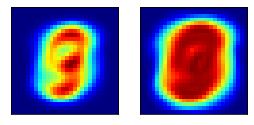

In [0]:
# Analysis the scalerModel object. Access the mean and std of the data
meanValues = scalerModel.mean
stdValues= scalerModel.std

# Plot these values
fig = plot_data([scalerModel.mean,scalerModel.std] , h, w)

# display(fig)

**_The answer should be_:**
<pre><code>
<img src="http://www.tsc.uc3m.es/~vanessa/figsdatabricks/fig_digits_stats.png"/>
</code></pre>

**1.d) Preparing training DF**

To finish the preprocessing of the data, let's create the training DF. For this DF to be able to interact with MLLIB functions it is required that it has two columns with the following names:
* "label": where the data labels have to be stored.
* "features": where the features, used as input of the classifiers, have to be stored.

**Exercise**: transform the DF "scaledData" by selecting the columns "label" and "normFeatures" and, renaming this last column as "features". Call this new DF "trainDF".

In [0]:
# Transform the DF "scaledData" by selecting the columns "label" and "normFeatures" & renaming this last column as "features"

# Create the training data DF
trainDF = scaledData.select("label", scaledData["normFeatures"].alias("features"))

# Display the resulting DF
trainDF.show(5)
trainDF.first()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Out[28]: Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7

**_The answer should be_:**
<pre><code>
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  5.0|(784,[152,153,154...|
|  0.0|(784,[127,128,129...|
|  4.0|(784,[160,161,162...|
|  1.0|(784,[158,159,160...|
|  9.0|(784,[208,209,210...|
+-----+--------------------+
only showing top 5 rows

Out[30]: Row(label=5.0, features=SparseVector(784, {152: 0.0314, 153: 0.1746, 154: 0.168, 155: 0.1659, 156: 1.1678, 157: 1.2939, 158: 1.7689, 159: 0.2904, 160: 2.1633, 161: 4.121, 162: 5.1998, 163: 3.6403, 176: 0.4516, 177: 0.4471, 178: 1.0173, 179: 1.5176, 180: 1.5781, 181: 2.2789, 182: 2.2555, 183: 2.2522, 184: 2.2523, 185: 2.2559, 186: 2.0479, 187: 1.658, 188: 2.7184, 189: 3.0987, 190: 3.152, 191: 1.3923, 203: 0.7658, 204: 3.0105, 205: 2.742, 206: 2.4864, 207: 2.3542, 208: 2.301, 209: 2.2915, 210: 2.291, 211: 2.2974, 212: 2.2953, 213: 2.2679, 214: 0.838, 215: 0.7548, 216: 0.8114, 217: 0.6372, 218: 0.5509, 231: 0.2477, 232: 2.4867, 233: 2.5283, 234: 2.3593, 235: 2.2913, 236: 2.277, 237: 2.2717, 238: 1.7808, 239: 1.6426, 240: 2.2299, 241: 2.1708, 260: 0.8545, 261: 1.4945, 262: 0.9728, 263: 2.2701, 264: 2.2724, 265: 1.8618, 266: 0.1009, 268: 0.3933, 269: 1.3931, 289: 0.1317, 290: 0.0091, 291: 1.3902, 292: 2.3431, 293: 0.8648, 319: 1.2773, 320: 2.4313, 321: 1.8977, 322: 0.0195, 347: 0.1017, 348: 1.8272, 349: 2.4551, 350: 0.6428, 376: 0.3291, 377: 2.2168, 378: 1.9769, 379: 1.4336, 380: 0.9823, 381: 0.0089, 405: 0.7261, 406: 2.1103, 407: 2.31, 408: 2.3033, 409: 1.0589, 410: 0.2251, 434: 0.3996, 435: 1.7013, 436: 2.272, 437: 2.2466, 438: 1.3656, 439: 0.2592, 463: 0.1438, 464: 0.8293, 465: 2.2655, 466: 2.3315, 467: 1.7975, 493: 2.2667, 494: 2.3366, 495: 2.3859, 496: 0.6615, 518: 0.4138, 519: 1.1717, 520: 1.6607, 521: 2.2957, 522: 2.3206, 523: 1.9782, 524: 0.021, 544: 0.3593, 545: 1.3416, 546: 2.0545, 547: 2.2783, 548: 2.2875, 549: 2.2774, 550: 2.2933, 551: 1.7754, 570: 0.22, 571: 1.0324, 572: 1.9874, 573: 2.2669, 574: 2.2696, 575: 2.2748, 576: 2.2744, 577: 1.8188, 578: 0.7322, 596: 0.2227, 597: 0.6063, 598: 1.9165, 599: 2.2699, 600: 2.2776, 601: 2.2925, 602: 2.2877, 603: 1.7844, 604: 0.7323, 605: 0.0186, 622: 0.2773, 623: 2.0469, 624: 2.2357, 625: 2.3634, 626: 2.2686, 627: 2.2418, 628: 2.2499, 629: 1.739, 630: 0.7129, 631: 0.0809, 648: 3.1738, 649: 5.777, 650: 4.8899, 651: 3.9084, 652: 3.0801, 653: 2.6436, 654: 2.4196, 655: 2.2354, 656: 1.2031, 657: 0.0998, 676: 14.4017, 677: 15.0629, 678: 9.2458, 679: 6.182, 680: 3.8245, 681: 1.9369, 682: 1.6289, 683: 0.1813}))
</code></pre>

### **1.e) Preparing the test DF**
Now, let's load and preprocess the test data.

**Exercise**: load the test data file ("mnist.t") and apply the normalization that you have already learned with the training data (i.e., the test data have to be normalized with the standard deviation of the training data). 

As result, you have to provide a new DF, called "testDF", with the columns: "label" (where you have to store the test data labels) and "features" (where the normalized test data features have to be stored).

In [0]:
# Load test data (mnist.t)
fileName = "/FileStore/tables/mnist.t"
dataTestDF = spark.read.format("libsvm").option("numFeatures", "784").load(fileName)

# Normalize the test data with the standard deviation of the training data
# We use the pre-trained scaler. It is state-of-art behaviour to use scaler trained on training data on test data 
scaledDataTest = scalerModel.transform(dataTestDF) 

# Create the test DF
# It will have the columns: "label" (where the test data labels are stored) and "features" (where the normalized test data features are stored)
testDF = scaledDataTest.select("label", scaledDataTest["normFeatures"].alias("features"))

# Display the resulting DF
testDF.show(5)
testDF.first()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  7.0|(784,[202,203,204...|
|  2.0|(784,[94,95,96,97...|
|  1.0|(784,[128,129,130...|
|  0.0|(784,[124,125,126...|
|  4.0|(784,[150,151,159...|
+-----+--------------------+
only showing top 5 rows

Out[29]: Row(label=7.0, features=SparseVector(784, {202: 1.7427, 203: 2.8914, 204: 2.0112, 205: 1.6365, 206: 0.5897, 207: 0.335, 230: 3.9602, 231: 3.4952, 232: 2.8841, 233: 2.5383, 234: 2.3686, 235: 2.1827, 236: 1.782, 237: 1.7779, 238: 1.7808, 239: 1.787, 240: 1.7876, 241: 1.7835, 242: 1.7776, 243: 1.7967, 244: 1.6253, 245: 0.5613, 258: 1.1105, 259: 1.4607, 260: 0.769, 261: 1.0921, 262: 1.482, 263: 2.0368, 264: 2.2814, 265: 2.0434, 266: 2.3308, 267: 2.3357, 268: 2.3232, 269: 2.2616, 270: 2.0605, 271: 2.3095, 272: 2.4288, 273: 1.5077, 291: 0.1535, 292: 0.6113, 293: 0.1345, 294: 0.6507, 295: 0.6369, 296: 0.6238, 297: 0.5376, 298: 0.1901, 299: 2.1627, 300: 2.4793, 301: 1.1789, 326: 0.7517, 327: 2.3442, 328:

**_The answer should be_:**
<pre><code>
dataTestDF:pyspark.sql.dataframe.DataFrame = [label: double, features: udt]
scaledDataTest:pyspark.sql.dataframe.DataFrame = [label: double, features: udt ... 1 more fields]
testDF:pyspark.sql.dataframe.DataFrame = [label: double, features: udt]
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  7.0|(784,[202,203,204...|
|  2.0|(784,[94,95,96,97...|
|  1.0|(784,[128,129,130...|
|  0.0|(784,[124,125,126...|
|  4.0|(784,[150,151,159...|
+-----+--------------------+
only showing top 5 rows

Out[31]: Row(label=7.0, features=SparseVector(784, {202: 1.7427, 203: 2.8914, 204: 2.0112, 205: 1.6365, 206: 0.5897, 207: 0.335, 230: 3.9602, 231: 3.4952, 232: 2.8841, 233: 2.5383, 234: 2.3686, 235: 2.1827, 236: 1.782, 237: 1.7779, 238: 1.7808, 239: 1.787, 240: 1.7876, 241: 1.7835, 242: 1.7776, 243: 1.7967, 244: 1.6253, 245: 0.5613, 258: 1.1105, 259: 1.4607, 260: 0.769, 261: 1.0921, 262: 1.482, 263: 2.0368, 264: 2.2814, 265: 2.0434, 266: 2.3308, 267: 2.3357, 268: 2.3232, 269: 2.2616, 270: 2.0605, 271: 2.3095, 272: 2.4288, 273: 1.5077, 291: 0.1535, 292: 0.6113, 293: 0.1345, 294: 0.6507, 295: 0.6369, 296: 0.6238, 297: 0.5376, 298: 0.1901, 299: 2.1627, 300: 2.4793, 301: 1.1789, 326: 0.7517, 327: 2.3442, 328: 2.111, 329: 0.2115, 353: 0.198, 354: 2.0945, 355: 2.397, 356: 0.8737, 381: 1.1503, 382: 2.277, 383: 2.2733, 384: 0.4736, 408: 0.5371, 409: 2.2157, 410: 2.2868, 411: 0.5946, 436: 1.1944, 437: 2.2555, 438: 1.7024, 439: 0.048, 463: 0.0809, 464: 1.828, 465: 2.2296, 466: 0.5345, 491: 1.1273, 492: 2.287, 493: 1.6568, 518: 0.6746, 519: 2.2622, 520: 2.1779, 521: 0.5172, 545: 0.1722, 546: 1.9827, 547: 2.2873, 548: 1.5009, 572: 0.027, 573: 1.8189, 574: 2.2785, 575: 1.9691, 576: 0.3146, 600: 0.3421, 601: 2.3015, 602: 2.2967, 603: 0.6939, 627: 0.2747, 628: 1.992, 629: 2.2651, 630: 1.0248, 631: 0.009, 655: 1.2185, 656: 2.2977, 657: 2.3047, 658: 0.482, 682: 0.7527, 683: 2.7424, 684: 2.7881, 685: 2.8049, 686: 0.6033, 710: 2.3262, 711: 4.4795, 712: 4.3152, 713: 3.7599, 714: 0.7319, 738: 3.9295, 739: 7.4372, 740: 5.8657, 741: 0.5192}))
</code></pre>

## **2. Solving classification problems**

MLLIB includes distributed implementations of the most common classifiers, such as, logistic regression, decission trees, random forest or linear SVMs. 

In this notebook, we are going to use the linear SVM as the classifier. The procedure to train, predict and evaluate this classifier would be similar to any of the other classifiers, so the content of this notebook can easily be extended to other classifiers.

**2.a) Binary classification with SVMs**

Standard SVM is a binary classifier. Thus, to start to work with this classifier let's convert the multiclass original problem to a binary one by solving the problem of differentiating the digits "3" from the digits "5".

**Exercise**: Build the binary DFs for training and testing by following these steps:
1. Select form the "trainDF" and "testDF" the rows with label "3" or "5" (use filter()). 
2. Convert the label values of the resulting DF to the binary values "0" and "1". For this purpose, you can use the "changeLabels" UDF defined in the next cell.

In [0]:
from pyspark.sql.types import *

# User defined function to convert labels "3" and "5" to binary values "1" and "0" 
changeLabels = udf(lambda label: 1 if (label==3) else 0, IntegerType())

In [0]:
# Create the training DF for the binary problem 3 vs. 5 

## Select digits 3 and 5
trainDFBinaryAux= trainDF.filter((trainDF.label == 3) | (trainDF.label == 5))

## Convert labels to 0 and 1
trainDFBinary = trainDFBinaryAux.select(changeLabels("label").alias("label"), "features")

trainDFBinary.show(5)
print('Number of traning samples ' + str(trainDFBinary.count()))


# Create the test DF for the binary problem 3 vs 5

## Select digits 3 and 5
testDFBinaryAux = testDF.filter((testDF.label == 3) | (testDF.label == 5))

## Convert labels to 0 and 1
testDFBinary = testDFBinaryAux.select(changeLabels("label").alias("label"), "features")
testDFBinary.show(5)
print('Number of test samples ' + str(testDFBinary.count()))

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[152,153,154...|
|    1|(784,[151,152,153...|
|    1|(784,[123,124,125...|
|    0|(784,[216,217,218...|
|    1|(784,[143,144,145...|
+-----+--------------------+
only showing top 5 rows

Number of traning samples 11552
+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[129,130,131...|
|    0|(784,[124,125,126...|
|    1|(784,[118,119,120...|
|    0|(784,[156,157,158...|
|    1|(784,[175,176,177...|
+-----+--------------------+
only showing top 5 rows

Number of test samples 1902


**_The answer should be_:**
<pre><code>
+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[152,153,154...|
|    1|(784,[151,152,153...|
|    1|(784,[123,124,125...|
|    0|(784,[216,217,218...|
|    1|(784,[143,144,145...|
+-----+--------------------+
only showing top 5 rows

Number of traning samples 11552
+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|(784,[129,130,131...|
|    0|(784,[124,125,126...|
|    1|(784,[118,119,120...|
|    0|(784,[156,157,158...|
|    1|(784,[175,176,177...|
+-----+--------------------+
only showing top 5 rows

Number of test samples 1902
</code></pre>

**Exercise**: Train a binary [linear SVM classifier](https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-support-vector-machine) to able to differenciate digits 3 from digits 5. Show the coefficients and bias (or intercept) of the resulting classifier.

*Note:* After training the lsvc object, you will obtain a new object (lsvcModel) with the trained SVM. Remember that you can check their parameters and methods typing help(lsvcModel)

In [0]:
from pyspark.ml.classification import LinearSVC
# PySpark MLLib API provides a LinearSVC class to classify data with linear SVMs. The method is widely used to implement classification, regression, and anomaly detection techniques in ML.
# SVM builds hyperplane(s) in a high dimensional space to separate data into two groups
# Linear SVM classifies data into two groups by using linear straight line.
# SVC Classification example tutorial: https://www.datatechnotes.com/2022/02/pyspark-linear-svc-classification.html

# Define the classifier
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc.fit(trainDFBinary)


In [0]:
# Print the coefficients and intercept for linearsSVC
coefficients = lsvcModel.coefficients
intercept = lsvcModel.intercept
print("Some coefficients: " + str(coefficients[250:300]))
print("Intercept: " + str(intercept))

Some coefficients: [-0.00503628 -0.00132885  0.          0.00126173  0.00227966  0.02608547
  0.05871618  0.03443694  0.02193514  0.00136647 -0.02733835 -0.04217431
 -0.06044608 -0.08564233 -0.06133984 -0.00355557  0.05431954  0.09815572
  0.08667559  0.06678955  0.05470663  0.03951634  0.02318501 -0.0065486
 -0.04603254 -0.08474889 -0.06036465 -0.02330273 -0.00422041 -0.00138298
  0.          0.0029333   0.00626491  0.03212335  0.03057417  0.0191151
 -0.00570462 -0.03476342 -0.06753077 -0.08810949 -0.09415329 -0.11641097
 -0.08013833 -0.00184359  0.05084453  0.0723497   0.07656243  0.08159644
  0.08968747  0.07798104]
Intercept: -1.0881673468738582


**_The answer should be_:**
<pre><code>
Some coefficients: [-0.00811581 -0.00155393  0.          0.00075426  0.00546287  0.01589203
  0.02332875  0.02345315  0.01133168  0.00204586 -0.01587148 -0.03831883
 -0.05673717 -0.06903806 -0.04944357 -0.0330097  -0.00822104  0.02422009
  0.0333946   0.03522194  0.03150301  0.02456392  0.01293632 -0.0133156
 -0.02713423 -0.0401274  -0.03177593 -0.01787716 -0.00728533 -0.00161424
  0.          0.00175353  0.00669578  0.01628817  0.01763349  0.00970026
 -0.00178221 -0.02566225 -0.05377013 -0.07652784 -0.08909582 -0.08746426
 -0.05756012 -0.01961768  0.01662599  0.03718076  0.04844331  0.05106937
  0.04733887  0.03992283]
Intercept: -0.00149776081873
</code></pre>

In [0]:
# help(lsvcModel)

**2.b) SVM evaluation**

**Exercise**: Compute the SVM output over the test data and compute the SVM accuracy (percentage of correctly classified data) over the test data.

*Note 1:* To compute the predictions of a MLLIB classifier over a DF, you can use the method "transform" of the classifier model (lsvcModel).

*Note 2:* MLLIB includes two objects two evaluate the performance of classification problems:
* [BinaryClassificationEvaluator](https://spark.apache.org/docs/2.2.0/mllib-evaluation-metrics.html#binary-classification) which only includes specific measurements for binary problems, such as, the AUC ("areaUnderROC") and area under the Precision-Recall curve ("areaUnderPR").
* [MulticlassClassificationEvaluator](https://spark.apache.org/docs/2.2.0/api/scala/index.html#org.apache.spark.ml.evaluation.MulticlassClassificationEvaluator) which let the user evaluate measurements common of binary and multiclass problems, such as, "f1" (default), "weightedPrecision", "weightedRecall", **"accuracy"**.

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator 
# BinaryClassEv.. - Evaluator for binary classification. Expects input columns: rawPrediction, label and weight (optional)
# MultiClassEv... - Evaluator for multiclass classification. Expects input columns: prediction, label, weight (optional) and probabilityCol (only for logLoss).
# Use multiclass for accuracy 

# Compute predictions for test data
predictions = lsvcModel.transform(testDFBinary)

# Show the computed predictions and compare with the original labels
predictions.select("features", "label", "prediction").show(10)

# Define the evaluator method with the corresponding metric and compute the classification error on test data

# option 1 - 3,80 seconds
#evaluator = MulticlassClassificationEvaluator()

# option 2 - 3,56 seconds
evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions) 

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[129,130,131...|    0|       0.0|
|(784,[124,125,126...|    0|       0.0|
|(784,[118,119,120...|    1|       1.0|
|(784,[156,157,158...|    0|       0.0|
|(784,[175,176,177...|    1|       1.0|
|(784,[148,149,150...|    1|       1.0|
|(784,[121,122,123...|    1|       1.0|
|(784,[152,153,154...|    0|       0.0|
|(784,[172,173,174...|    1|       1.0|
|(784,[163,164,165...|    0|       0.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy = 0.963197


**_The answer should be_:**
<pre><code>
predictions:pyspark.sql.dataframe.DataFrame = [label: integer, features: udt ... 2 more fields]
+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[129,130,131...|    0|       0.0|
|(784,[124,125,126...|    0|       0.0|
|(784,[118,119,120...|    1|       1.0|
|(784,[156,157,158...|    0|       0.0|
|(784,[175,176,177...|    1|       1.0|
|(784,[148,149,150...|    1|       1.0|
|(784,[121,122,123...|    1|       1.0|
|(784,[152,153,154...|    0|       0.0|
|(784,[172,173,174...|    1|       1.0|
|(784,[163,164,165...|    0|       0.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy = 0.950578
</code></pre>

**2.c) Multiclass SVM**

Now let's solve the original multiclass problem. Despite MLLIB SVM implementation only admits binary problems, MLLIB includes a wrapper to solve [multiclass problems 1 vs. all](https://spark.apache.org/docs/latest/ml-classification-regression.html#one-vs-rest-classifier-aka-one-vs-all) fashion.

**Exercise**: Train a multiclass SVM classifier to classify digit images from "0" to "9" and compute its accuracy over the test data. For this purpose, use the dataframes trainDF and testDF generated in Sections 1.d) and 1.e).

*Note:* the 1 vs all approach has to train 10 binary classifiers, so the training can take a while (please, be patient)

In [0]:
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# OneVsRest - Reduction of Multiclass Classification to Binary Classification. Performs reduction using one against all strategy. For a multiclass classification with k classes, train k models (one per class). Each example is scored against all k models and the model with highest score is picked to label the example.

# Define the binary classifier
lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Define the One Vs All Classifier
ovr = OneVsRest(classifier=lsvc)

# Train the multiclass model
ovrModel = ovr.fit(trainDF)

# Ccore the model on test data
predictions = ovrModel.transform(testDF)

# Display computed predictions & compare with the original labels
predictions.select("features", "label", "prediction").show(10)

# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions) 

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

# took a lot of time to run - almost 4 mins

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[202,203,204...|  7.0|       7.0|
|(784,[94,95,96,97...|  2.0|       2.0|
|(784,[128,129,130...|  1.0|       1.0|
|(784,[124,125,126...|  0.0|       0.0|
|(784,[150,151,159...|  4.0|       4.0|
|(784,[156,157,158...|  1.0|       1.0|
|(784,[149,150,151...|  4.0|       4.0|
|(784,[179,180,181...|  9.0|       9.0|
|(784,[129,130,131...|  5.0|       5.0|
|(784,[209,210,211...|  9.0|       9.0|
+--------------------+-----+----------+
only showing top 10 rows

Test accuracy = 0.8727


**_The answer should be_:**
<pre><code>
+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(784,[202,203,204...|  7.0|       7.0|
|(784,[94,95,96,97...|  2.0|       2.0|
|(784,[128,129,130...|  1.0|       1.0|
|(784,[124,125,126...|  0.0|       0.0|
|(784,[150,151,159...|  4.0|       4.0|
|(784,[156,157,158...|  1.0|       1.0|
|(784,[149,150,151...|  4.0|       4.0|
|(784,[179,180,181...|  9.0|       9.0|
|(784,[129,130,131...|  5.0|       4.0|
|(784,[209,210,211...|  9.0|       9.0|
+--------------------+-----+----------+
only showing top 10 rows
Test accuracy = 0.8605
</code></pre>

**2.d) Cross validation of hyperparameters**

As you know, the linear SVM has a hyper parameter C, which makes a trade off between the margin and the number of wrongly classified samples, and its value becomes critical for the final SVM performance and generalization capability. So far, we have set its value to 0.1 (regParam = 0.1). In this section we are going to use one of the MLLIB parameter tunning utilities to properly adjust its value.

MLLIB includes two objects to carry out this validation process:

* [CrossValidator](https://spark.apache.org/docs/latest/ml-tuning.html#cross-validation)
* [TrainValidationSplit](https://spark.apache.org/docs/latest/ml-tuning.html#train-validation-split)

Whereas 'CrossValidator' runs standard cross validation with a prefixed number of partitions, 'TrainValidationSplit' only evaluates each combination of parameters once. So, 'TrainValidationSplit' is computationally less expensive, but it will not produce as reliable results when the training dataset is not sufficiently large.

Due to the execution a complete cross-validation process would take a long time. We will here perform the adjustment of C using the quick MLLIB version ('TrainValidationSplit') and, in addition, we are going to work again over the binary problem (classification of the digits "3" and "5").

**Exercise:** Train and evaluate a binary linear SVM classifier when is solving the task of differenciating digits 3 from digits 5 (use the trainDFBinary and testDFBinary generated in Section 2.a)). Adjust its parameter C with a 'TrainValidationSplit' procedure using a 20% of the data for validation and exploring the following range of C values: 100, 10, 1, 0.1, 0.01.

*Note:* You may need to use the method [ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.tuning.ParamGridBuilder) to declarate the range of values to explore and after training the TrainValidationSplit model, you can analyze the model_tvs to check the selected value.

In [0]:
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


#""" 
# option 1 - Command took 1.47 minutes 
# Define the  the Classifier
lsvc = LinearSVC(maxIter=10)
c_values = [100, 10, 1, 0.1, 0.01]

# We use a ParamGridBuilder to construct a grid of parameters to search over.TrainValidationSplit will 
# try all combinations of values and determine best model using the evaluator.
paramGrid = ParamGridBuilder().addGrid(lsvc.regParam, c_values).build()

evaluator = MulticlassClassificationEvaluator()
# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, an Evaluator and the percentage of training/validation data
tvs = TrainValidationSplit(estimator=lsvc, estimatorParamMaps=paramGrid, evaluator=evaluator, trainRatio=0.80)

# Run TrainValidationSplit to choose the best parameter. It also trains the final model for the selected value of C.
model_tvs = tvs.fit(trainDFBinary)

# Check the validation accuracy over each C value 
print ("Validation accuracies:")
print (model_tvs.validationMetrics)

# Make predictions on test data. 
predictions = model_tvs.transform(testDFBinary)
    
# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator = MulticlassClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)

# Show the accuracy
print("Test accuracy = %g" % (accuracy))

#"""


"""
# option 2 - Command took 1.82 minutes
# Define the  the Classifier
lsvc = LinearSVC(maxIter=10)

# We use a ParamGridBuilder to construct a grid of parameters to search over.
# TrainValidationSplit will try all combinations of values and determine best model using
# the evaluator.
paramGrid = ParamGridBuilder().addGrid(lsvc.regParam, [10, 1, 0.1, 0.01, 0.001, 0.0001]).build()

# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, an Evaluator and the percentage of training/validation data
tvs = TrainValidationSplit(estimator=lsvc, estimatorParamMaps=paramGrid, trainRatio=0.8, evaluator=MulticlassClassificationEvaluator(metricName = 'accuracy'))

# Run TrainValidationSplit to choose the best parameter. It also trains the final model for the selected value of C.
model_tvs = tvs.fit(trainDFBinary)

# Check the validation accuracy over each C value 
print("Validation accuracies: ")
print(model_tvs.validationMetrics)

# Make predictions on test data. 
predictions = model_tvs.transform(testDFBinary)
    
# Define the evaluator method with the corresponding metric and compute the classification error on test data
evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
accuracy = evaluator.evaluate(predictions) 

# Show the accuracy
print("Test accuracy = %g" % (accuracy))
"""

Validation accuracies:
[0.3567762945285504, 0.9413298247234687, 0.9539296458099054, 0.9573956604877858, 0.956957296052668]
Test accuracy = 0.963181
Out[37]: '\n# option 2 - Command took 1.82 minutes\n# Define the  the Classifier\nlsvc = LinearSVC(maxIter=10)\n\n# We use a ParamGridBuilder to construct a grid of parameters to search over.\n# TrainValidationSplit will try all combinations of values and determine best model using\n# the evaluator.\nparamGrid = ParamGridBuilder().addGrid(lsvc.regParam, [10, 1, 0.1, 0.01, 0.001, 0.0001]).build()\n\n# A TrainValidationSplit requires an Estimator, a set of Estimator ParamMaps, an Evaluator and the percentage of training/validation data\ntvs = TrainValidationSplit(estimator=lsvc, estimatorParamMaps=paramGrid, trainRatio=0.8, evaluator=MulticlassClassificationEvaluator(metricName = \'accuracy\'))\n\n# Run TrainValidationSplit to choose the best parameter. It also trains the final model for the selected value of C.\nmodel_tvs = tvs.fit(trainDFBi

**_The answer should be_:**
<pre><code>
Validation accuracies:
[0.930959617889709, 0.9452887537993921, 0.9444203213200174, 0.9448545375597047, 0.9444203213200174, 0.9448545375597047]
Test accuracy = 0.950578
</code></pre>

### HOMEWORK: feature selection over Spark
Let's consider again the binary classification problem which has to differenciate in the digits "3" from the digits "5". Do you think that all the pixels in the image are equally important for this task? Efectivelly, the answer is **no**. In fact, there are pixels, like those in the background, that are always 0 and others that do not help us to differenciate a number "3" from a number "5" because they correspond to common strokes of both digits. 

In this part of the practice we will use a [two sample t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) to analyze the relevance of each pixel in this classification task and, then, select the most discriminating pixels and solve the classification problem with them alone.

The two sample t-test analizes whether 2 independent populations have identical average (expected) values and it provides a t-value indicating the relative difference between means. In our case, we will analyze for each pixel whether its mean value over the digits 3 is different from that over the digit 5.

The next cell includes the code to compute these t-values, but this example code is not implemented over Spark and it can only be run over a single machine (note that the code starts by taking a subset the data to the driver). So, you have to adapt this code to Spark, so that it can be run in a distributed way using the complete data.

*Note:* The example code works over 1000 data, so you can find slight differences when you run it over the complete dataset.

<command-4289028151304722>:29: RuntimeWarning: invalid value encountered in true_divide
  t_values= np.divide((mean0-mean1), np.sqrt(1./N0 + 1./N1)*std_common)


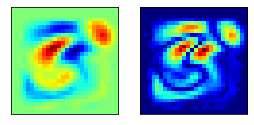

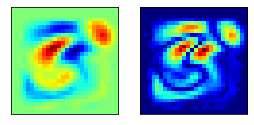

In [0]:
import numpy as np
from scipy.stats import t

###################################################
# EXAMPLE OF THE T-TEST FOR FEATURE SELECTION
# THIS CODE RUNS ON THE DRIVER 
# ADAPT IT TO BE RUN DISTRIBUTEDLY
###################################################

# Collect the training data 
trainingData = trainDFBinary.take(1000)

# Get the features of the data belonging to class 0, compute its mean 
data0 = np.array([data.features for data in trainingData if data.label==0])
mean0 = np.mean(data0, axis=0)

# Get the features of the data belonging to class 1, compute its mean 
data1 = np.array([data.features for data in trainingData if data.label==1])
mean1 = np.mean(data1, axis=0)

# Compute common variance
std_common = np.std(np.concatenate((data0 ,data1)), axis=0)

# Compute the number of data per class
N0 = data0.shape[0]
N1 = data1.shape[0]

# Compute t-values 
t_values= np.divide((mean0-mean1), np.sqrt(1./N0 + 1./N1)*std_common)
# Solving nan problems (some pixels are constant for all the data, so their means are 0, its std its 0 and its t_value is nan)
t_values[np.isnan(t_values)]=0

# We can plot the t_values and their absolute values
fig = plot_data([t_values,np.abs(t_values)], h, w)
display(fig)

# Ranking t-values
# The most discriminating pixels have very large or very small t values, so we rank over their absolute value
# np.argsort ranks in ascending order, so we invert the result to have the most discriminative pixels in the first positions
pos_relevant = np.argsort(np.abs(t_values))[::-1]

# Select the 200 most relevant pixels and build the new data set
pos_sel = pos_relevant[:200]

<command-3728091225947179>:19: RuntimeWarning: invalid value encountered in true_divide
  t_values_= np.divide((mean_0-mean_1), np.sqrt(1./N_0 + 1./N_1)*std_common_)


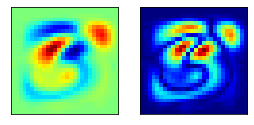

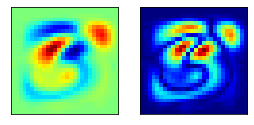

In [0]:
from pyspark.ml.feature import StandardScaler
import numpy as np

###################################################
# FEATURE SELECTION ADAPTED TO BE RUN DISTRIBUTEDLY
###################################################

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

trainDFBinary_0 = trainDFBinary.filter(trainDFBinary.label==0)
trainDFBinary_1 = trainDFBinary.filter(trainDFBinary.label==1)
scalerModel_0 = scaler.fit(trainDFBinary_0)
scalerModel_1 = scaler.fit(trainDFBinary_1)
scalerModel_all = scaler.fit(trainDFBinary)
mean_0 = np.array(scalerModel_0.mean)
mean_1 = np.array(scalerModel_1.mean)
std_common_ = np.array(scalerModel_all.std)
N_0 = trainDFBinary_0.count()
N_1 = trainDFBinary_1.count()

# Compute t-values 
t_values_= np.divide((mean_0-mean_1), np.sqrt(1./N_0 + 1./N_1)*std_common_)
# Solving nan problems (some pixels are constant for all the data, so their means are 0, its std its 0 and its t_value is nan)
t_values_[np.isnan(t_values_)]=0

# We can plot the t_values and their absolute values
fig = plot_data([t_values_,np.abs(t_values_)], h, w)
display(fig)

# Ranking t-values
# The most discriminating pixels have very large or very small t values, so we rank over their absolute value
# np.argsort ranks in ascending order, so we invert the result to have the most discriminative pixels in the first positions
pos_relevant_ = np.argsort(np.abs(t_values_))[::-1]

# We select the 200 most relevant pixels and built the new data set
pos_sel_ = pos_relevant_[:200]

Finally, analize the performance of the binary SVM when it is trained with the subset of 200 most relevant features. You can try to analyze the classifier performance for different number of selected features (for instance, 10, 100 and 200).

*Note:* you may need the method [VectorSlicer](https://spark.apache.org/docs/latest/ml-features.html#vectorslicer) to apply a feature selection mask over the train and test DFs.

In [0]:
from pyspark.ml.feature import VectorSlicer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


for k in range(30, 240, 30):
  
  # Get k first features
  slicer = VectorSlicer(inputCol="features", outputCol="subset_features", indices=pos_sel[0:k])
  
  slice_train = slicer.transform(trainDFBinary)
  slice_val = slicer.transform(testDFBinary)
  
  # Define your classifier
  lsvc = LinearSVC(maxIter=10, regParam=0.1, featuresCol='subset_features', labelCol="label")

  # Fit the model
  lsvcModel = lsvc.fit(slice_train)
  
  # Compute predictions for test data
  predictions = lsvcModel.transform(slice_val)

  # Show the computed predictions and compare with the original labels
  predictions.select("features", "label", "prediction")

  # Define the evaluator method with the corresponding metric and compute the classification error on test data
  evaluator = MulticlassClassificationEvaluator().setMetricName('accuracy')
  accuracy = evaluator.evaluate(predictions) 
  
  print(k)
  print(accuracy)

30
0.9011566771819137
60
0.9248159831756047
90
0.9379600420609885
120
0.9474237644584648
150
0.9505783385909569
180
0.955310199789695
210
0.953732912723449


##Conclusions

###Results of previous models:
After creating and fitting linear SVC models, we could see that our results are not the same as the ones indicated as "*The answer should be*". At first, we were concerned about the mistake that we could make during implementation. Later it appeared, that the issue is not about uncorrect code, it was about using newer version of software. Our labs were executed using cluster in Databricks Runtime Version 10.4LTS (Spark 3.2.1). Previous results were obtained by 7.3LTS version. We could observe differences in coefficients, intercept of linear SVC and as follows - accuracy. As expected, the latest version provided higher accuracy that older one. The source code of algorithm we use had to be improved between those releases. Improvement:
+ Classification between 3 and 5 (binary classification): 0.950578 -> 0.963197
+ Multiclass prediction (all 10 digits): 0.8605 -> 0.8727
+ Binary classification with tuning of hyperparameters: 0.950578 -> 0.963181
On average we obtain 1.3 percentage point improvement between version 7.3LTS and 10.4LTS. It may not seem much, but in reallity it is a noticable value. In case of digit recognition, our results don't matter so much, but we may use this algorithm, for example, in medicine and cancer recognition, which could have a real impact on human life. It this case we can interpret the improvement as a great success.

###Homework - feature extraction:
**Differences between using a subset vs a whole dataset.**
<br>
First noticable difference is execution time, which is significantly longer for a whole dataset, but in this way our results are more precise and reliable. On the diagrams showing priority of specific pixels we can observe little changes. Distribution is really similar on both of them, but there are some details that changed. For example, there are some pixels in upper right corner, which have greater impact and some pixels at the bottom of a digit, that have less impact than they used to.

**Best pixel number for a model**
<br>
If we want to train a good model, we should take care about data, that the model in learning on. The better the data, the more accurate the model. That's why we shouldn't provide too many features for learning process. In case of digit recognition we can get rid of pixels, which don't change between different classes. We obtained the best feature number by executing training and testing process on different numbers. Our accuracy increased up to 180 features; best result: 0.9553 Acc. Later, adding more features caused accuracy drop: for 210 features accuracy was 0.9537. It means, that impact of those pixels was not influential enough to win over model's fitting problems, which were caused by great number of features.